SAI RAINA
USC ID = 4650068238
Github Username = saitiger

In [1]:
import pandas as pd
from skmultilearn.problem_transform import LabelPowerset
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\SAITIGERRAINA\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SAITIGERRAINA\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\SAITIGERRAINA\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# 1(A)

In [2]:
df = pd.read_csv(r'../Data/diagnosis.csv', encoding='utf-16', sep='\t', names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra','Inflammation of Bladder','Nepritis'],decimal=",",header=None)
df.head()

Temperature Nausea Lumbar Urine Micturition Urethra  \
0         35.5     no    yes    no          no      no   
1         35.9     no     no   yes         yes     yes   
2         35.9     no    yes    no          no      no   
3         36.0     no     no   yes         yes     yes   
4         36.0     no    yes    no          no      no   

  Inflammation of Bladder Nepritis  
0                      no       no  
1                     yes       no  
2                      no       no  
3                     yes       no  
4                      no       no

In [3]:
# x_cat = df.iloc[:,1:6]
# x_non_cat = df.iloc[:,0]

# from sklearn.preprocessing import OrdinalEncoder

# from sklearn.pipeline import Pipeline

# pipe = Pipeline([
#     ('ord_enc', OrdinalEncoder())
    
# ])

# x_cat_trans = pipe.fit_transform(x_cat)

le = LabelEncoder()
df['Nausea'] = le.fit_transform(df['Nausea'])
df['Lumbar'] = le.fit_transform(df['Lumbar'])
df['Urine'] = le.fit_transform(df['Urine'])
df['Micturition'] = le.fit_transform(df['Micturition'])
df['Urethra'] = le.fit_transform(df['Urethra'])

# df['Inflammation of Bladder'] = le.fit_transform(df['Inflammation of Bladder'])
# df['Nepritis'] = le.fit_transform(df['Nepritis'])

#  NO --> 0 YES --> 1

In [4]:
x = df.iloc[:,:-2]
y = df.iloc[:,[-2,-1]]

In [5]:
df.head()

Temperature  Nausea  Lumbar  Urine  Micturition  Urethra  \
0         35.5       0       1      0            0        0   
1         35.9       0       0      1            1        1   
2         35.9       0       1      0            0        0   
3         36.0       0       0      1            1        1   
4         36.0       0       1      0            0        0   

  Inflammation of Bladder Nepritis  
0                      no       no  
1                     yes       no  
2                      no       no  
3                     yes       no  
4                      no       no

In [6]:
# classifier = LabelPowerset(DecisionTreeClassifier(random_state = 5))
# clf = classifier.fit(x,y)
# clf.classifier

# 1(B)

In [7]:
clf = DecisionTreeClassifier(random_state = 5)
clf.fit(x, y)

DecisionTreeClassifier(random_state=5)

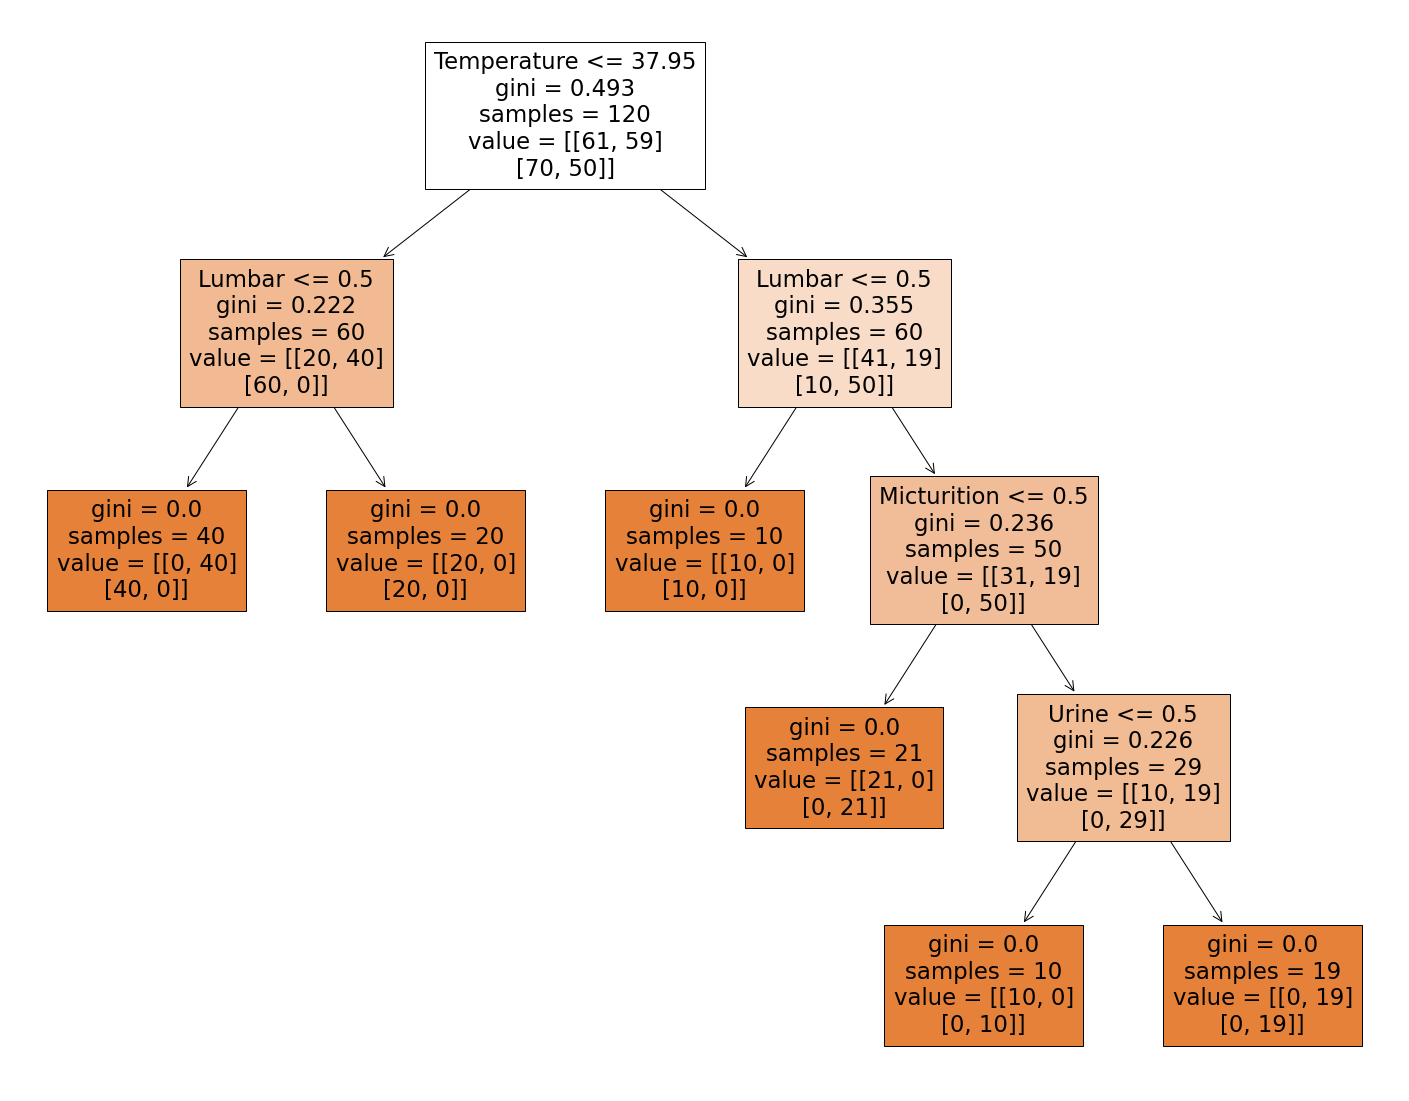

In [8]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra'],  
                   class_names=['Inflammation of Bladder','Nepritis'],
                   filled=True)

# 1(C)

In [9]:
def tree_to_pseudo(tree, feature_names):
    
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [10]:
tree_to_pseudo(clf,['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra'] )

 if ( Temperature <= 37.95000076293945 ) {
   if ( Lumbar <= 0.5 ) {
     return [[ 0. 40.]
 [40.  0.]]
   } else {
     return [[20.  0.]
 [20.  0.]]
   }
 } else {
   if ( Lumbar <= 0.5 ) {
     return [[10.  0.]
 [10.  0.]]
   } else {
     if ( Micturition <= 0.5 ) {
       return [[21.  0.]
 [ 0. 21.]]
     } else {
       if ( Urine <= 0.5 ) {
         return [[10.  0.]
 [ 0. 10.]]
       } else {
         return [[ 0. 19.]
 [ 0. 19.]]
       }
     }
   }
 }


# 1(D)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611])})

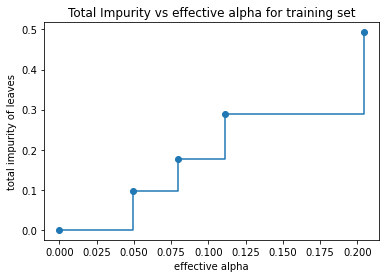

In [11]:
path = clf.cost_complexity_pruning_path(x,y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas, impurities, marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

dtc_gs = GridSearchCV(DecisionTreeClassifier(),
                     {
                        'ccp_alpha' : ccp_alphas
                         
                     }, cv = 5)
dtc_gs.fit(x,y)
# dtc_res = pd.DataFrame(dtc_gs.cv_results_)
# print(dtc_res[['params','mean_test_score']])
# print('Best Alpha Value : ',dtc_gs.best_estimator_)

ccp_alpha turns out to be zero based on gridsearch and the impurity vs alpha graph. I have fit the classifier for both alpha = 0
and alpha = 0.05 which is the highest nonzero alpha with same impurity as alpha = 0. Lower the impurity the better it is.

In [12]:
clf2 = DecisionTreeClassifier(ccp_alpha = 0,random_state = 10)

clf2.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0, random_state=10)

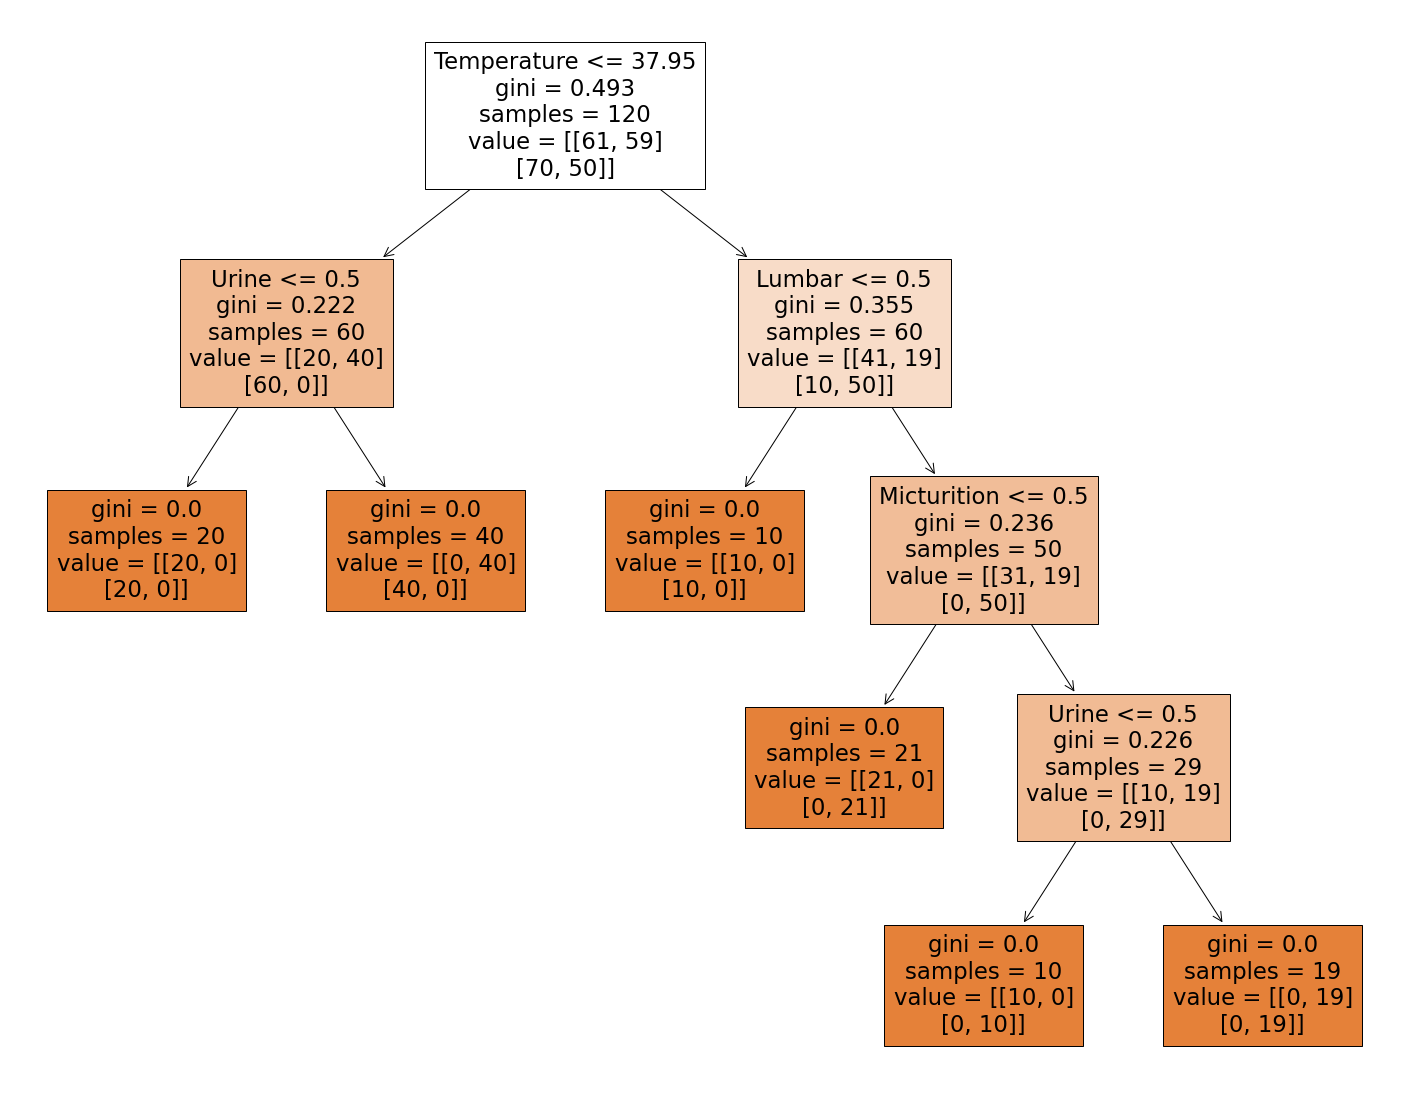

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf2, 
                   feature_names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra'],  
                   class_names=['Inflammation of Bladder','Nepritis'],
                   filled=True)

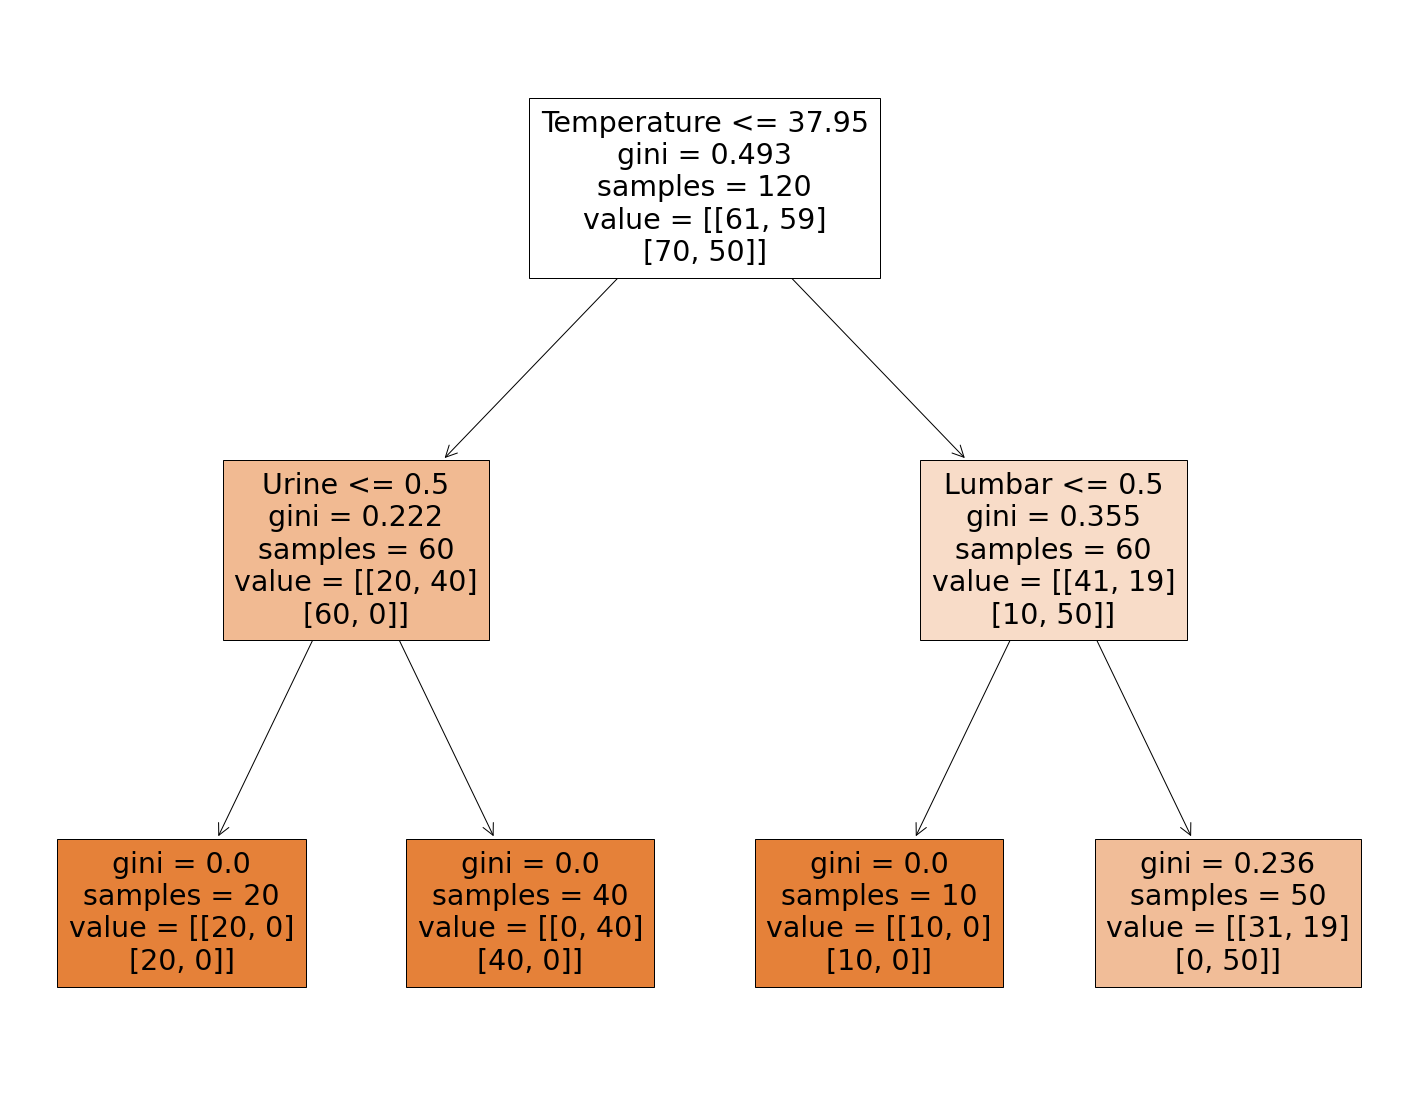

In [14]:
clf3 = DecisionTreeClassifier(ccp_alpha = 0.05,random_state = 10)
clf3.fit(x, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf3, 
                   feature_names=['Temperature','Nausea','Lumbar','Urine','Micturition','Urethra'],  
                   class_names=['Inflammation of Bladder','Nepritis'],
                   filled=True)

# 2(A)

In [15]:
dt = pd.read_csv(r'../Data/communities.csv',header = None)
dt.head()

0   1      2                    3    4     5     6     7     8     9    \
0    8   ?      ?         Lakewoodcity    1  0.19  0.33  0.02  0.90  0.12   
1   53   ?      ?          Tukwilacity    1  0.00  0.16  0.12  0.74  0.45   
2   24   ?      ?         Aberdeentown    1  0.00  0.42  0.49  0.56  0.17   
3   34   5  81440  Willingborotownship    1  0.04  0.77  1.00  0.08  0.12   
4   42  95   6096    Bethlehemtownship    1  0.01  0.55  0.02  0.95  0.09   

   ...   118   119   120   121   122  123  124   125   126   127  
0  ...  0.12  0.26  0.20  0.06  0.04  0.9  0.5  0.32  0.14  0.20  
1  ...  0.02  0.12  0.45     ?     ?    ?    ?  0.00     ?  0.67  
2  ...  0.01  0.21  0.02     ?     ?    ?    ?  0.00     ?  0.43  
3  ...  0.02  0.39  0.28     ?     ?    ?    ?  0.00     ?  0.12  
4  ...  0.04  0.09  0.02     ?     ?    ?    ?  0.00     ?  0.03  

[5 rows x 128 columns]

In [16]:
# Dropping non predictive columns
dt.drop(dt.iloc[:,0:5],axis=1,inplace = True)
dt.head()

5     6     7     8     9     10    11    12    13    14   ...   118  \
0  0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1  0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2  0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3  0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4  0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   

    119   120   121   122  123  124   125   126   127  
0  0.26  0.20  0.06  0.04  0.9  0.5  0.32  0.14  0.20  
1  0.12  0.45     ?     ?    ?    ?  0.00     ?  0.67  
2  0.21  0.02     ?     ?    ?    ?  0.00     ?  0.43  
3  0.39  0.28     ?     ?    ?    ?  0.00     ?  0.12  
4  0.09  0.02     ?     ?    ?    ?  0.00     ?  0.03  

[5 rows x 123 columns]

# 2(B)

In [17]:
dt.replace('?',np.nan,inplace = True)
print(" Count of Missing Values : ",dt.isnull().sum().sum())

 Count of Missing Values :  36851


In [18]:
dt.fillna(method='bfill',inplace=True)

In [19]:
dt

5     6     7     8     9     10    11    12    13    14   ...   118  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...  0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...  0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...  0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...  0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...  0.04   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1989  0.01  0.40  0.10  0.87  0.12  0.16  0.43  0.51  0.35  0.30  ...  0.01   
1990  0.05  0.96  0.46  0.28  0.83  0.32  0.69  0.86  0.73  0.14  ...  0.02   
1991  0.16  0.37  0.25  0.69  0.04  0.25  0.35  0.50  0.31  0.54  ...  0.08   
1992  0.08  0.51  0.06  0.87  0.22  0.10  0.58  0.74  0.63  0.41  ...  0.03   
1993  0.20  0.78  0.14  0.46  0.24  0.77  0.50  0.62  0.40  0.17  ...  0.11   

       119   120   121   122   123  124   125   126   127  
0     0.26  0.20  0.06  0.04   0.9  0.5  0.32  0.14  0.20  
1     0.12  0.45  0.06  0.06  0.91  0.5  0.00  0.26  0.67  
2     0.21  0.02  0.06  0.06  0.91  0.5  0.00  0.26  0.43  
3     0.39  0.28  0.06  0.06  0.91  0.5  0.00  0.26  0.12  
4     0.09  0.02  0.06  0.06  0.91  0.5  0.00  0.26  0.03  
...    ...   ...   ...   ...   ...  ...   ...   ...   ...  
1989  0.28  0.05  0.08  0.06  0.78    0  0.00  0.28  0.09  
1990  0.37  0.20  0.08  0.06  0.78    0  0.00  0.28  0.45  
1991  0.32  0.18  0.08  0.06  0.78    0  0.91  0.28  0.23  
1992  0.38  0.33  0.02  0.02  0.79    0  0.22  0.18  0.19  
1993  0.30  0.05  0.08  0.04  0.73  0.5  1.00  0.13  0.48  

[1994 rows x 123 columns]

In [20]:
train = dt.iloc[:1495,:]
test = dt.iloc[1496:,:]

x_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]

x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

# 2(C)

<AxesSubplot:>

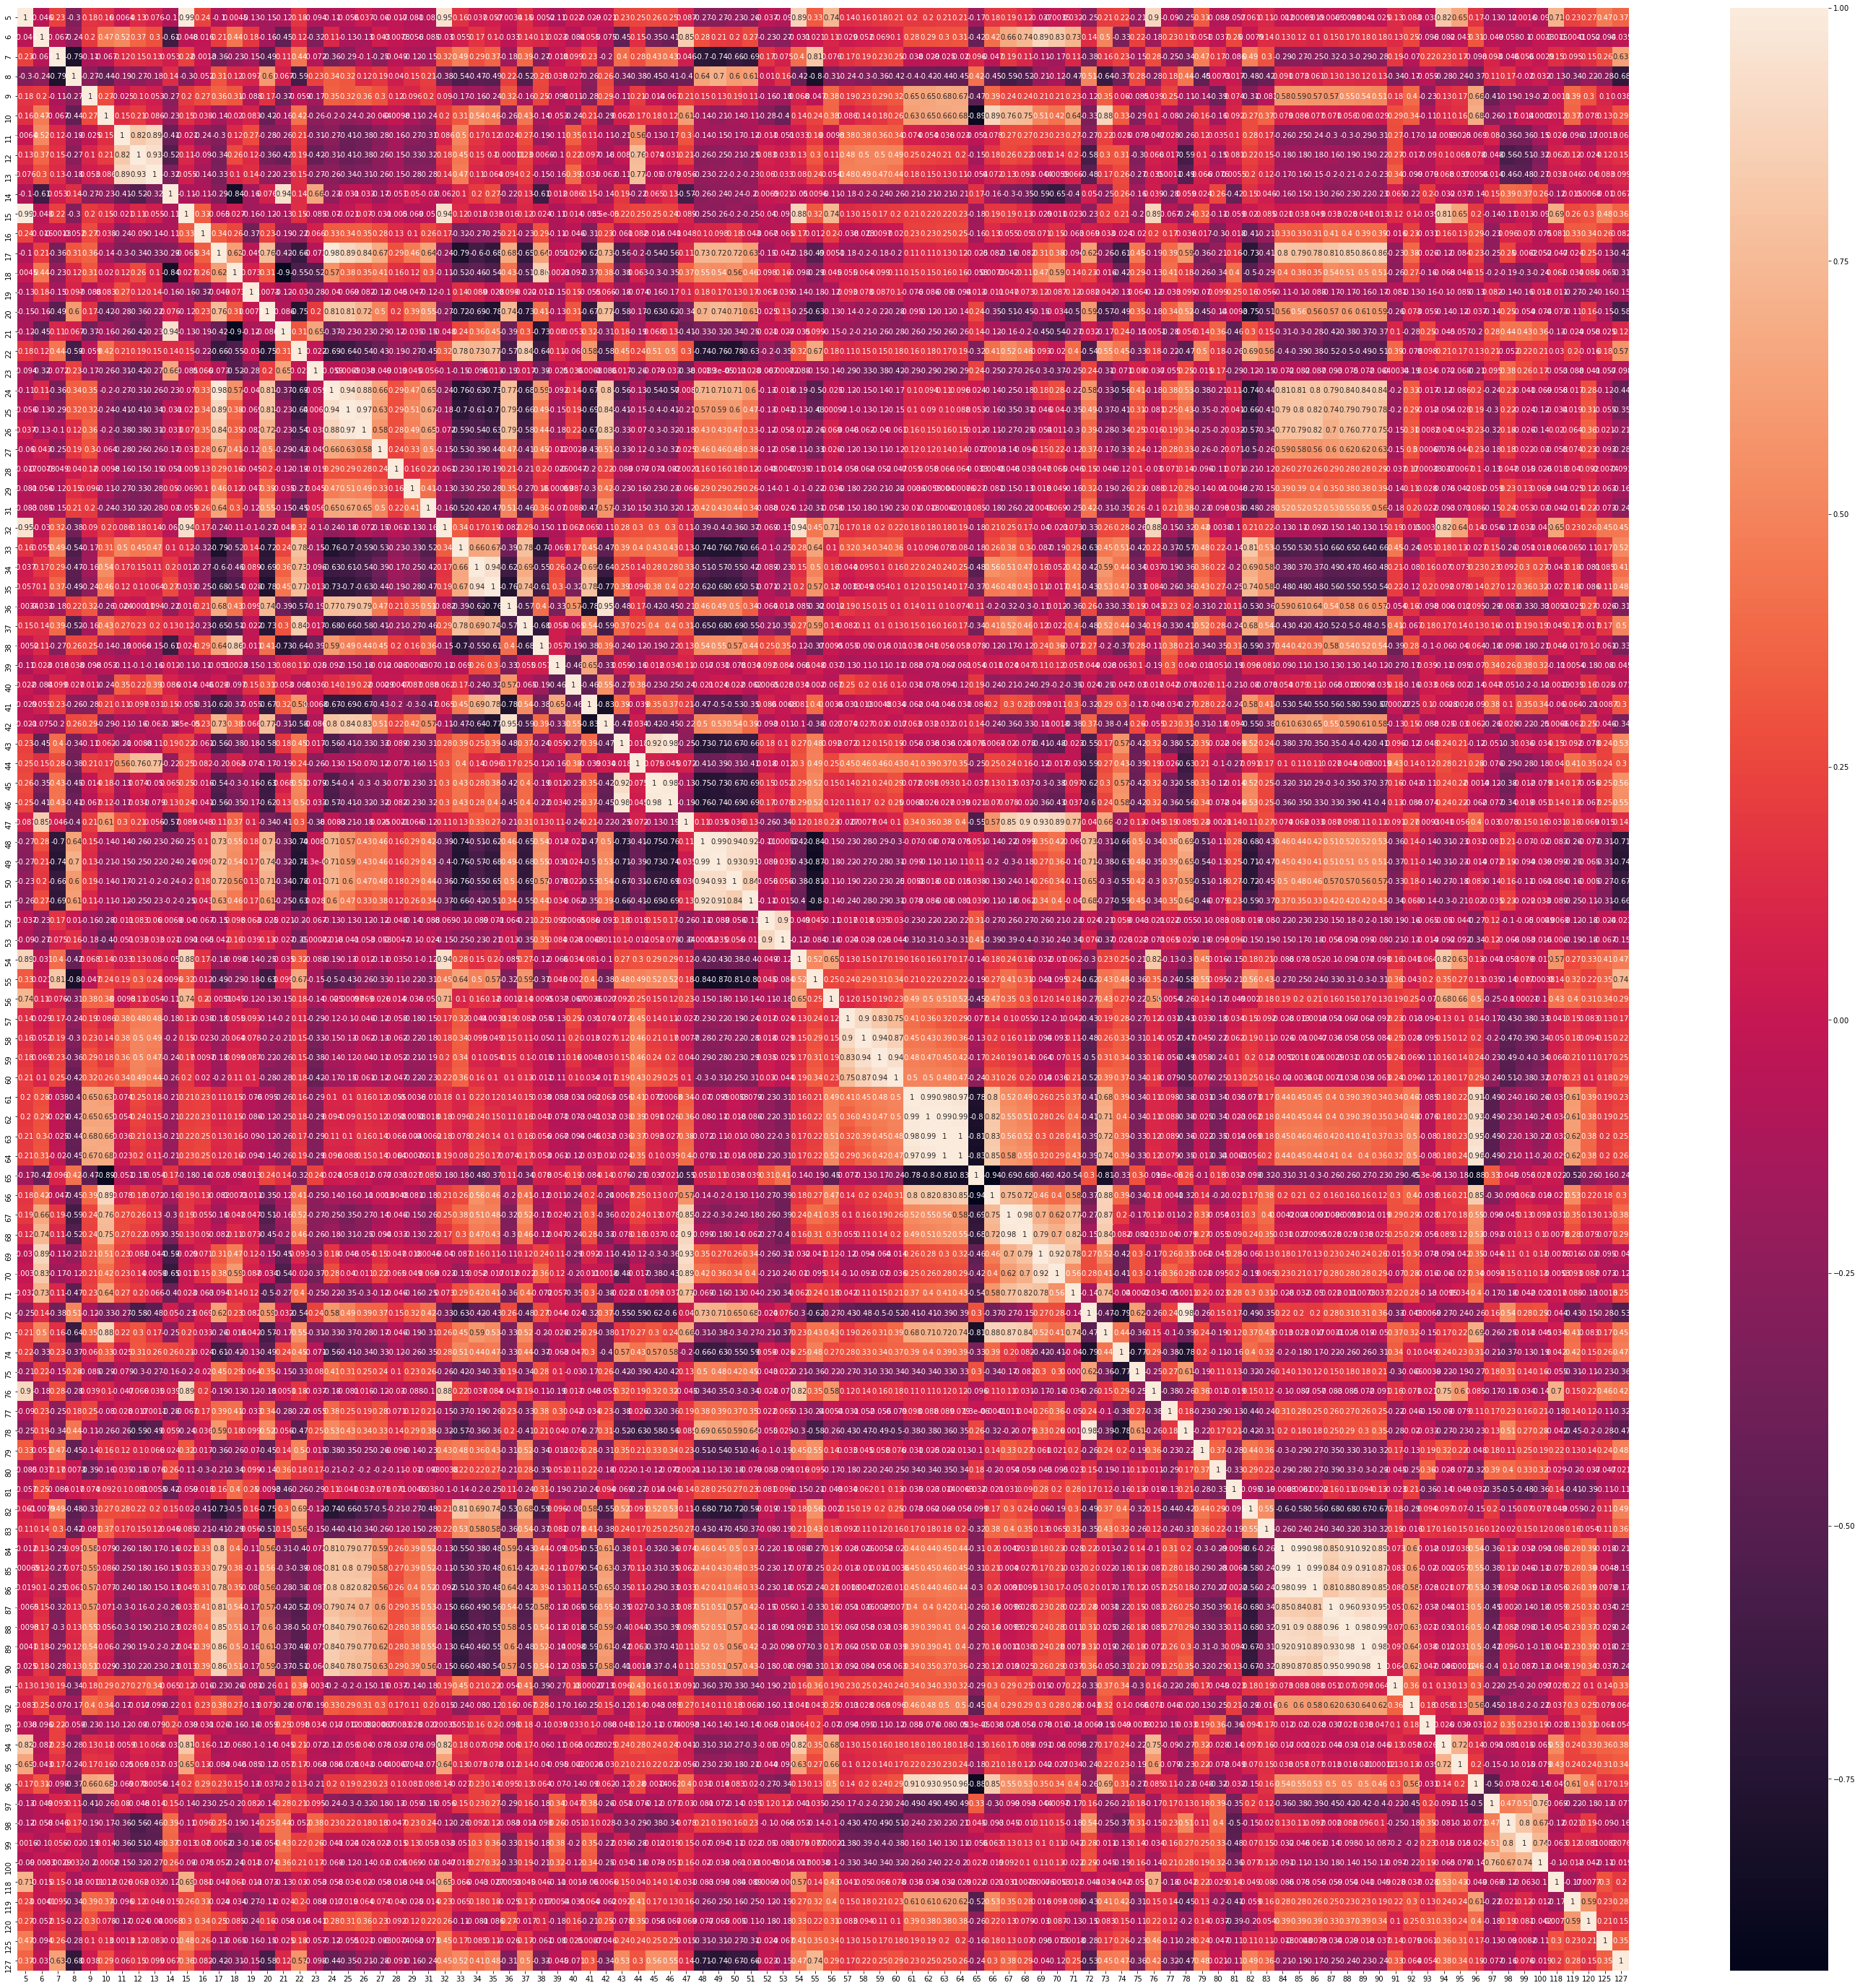

In [21]:
matrix = dt.corr()
fig1 = plt.figure(figsize=(50,50))
sns.heatmap(matrix, annot=True)

# 2 (D)

In [22]:
m = dt.mean()
s = dt.std()
CV = s/m
CV_df = pd.DataFrame(CV)
CV_df.reset_index(inplace = True)

In [23]:
CV_df.rename(columns={"index": "feature", 0: "CV"},inplace = True)

In [24]:
CV_df

feature        CV
0         5  2.203503
1         6  0.353298
2         7  1.410920
3         8  0.323782
4         9  1.359162
..      ...       ...
95      118  1.678031
96      119  0.872187
97      120  1.416673
98      125  2.555266
99      127  0.979015

[100 rows x 2 columns]

# 2 (E)

In [25]:
top_features = int(np.floor(np.sqrt(128)))
top_features

11

In [26]:
CV_sorted = CV_df.sort_values(by = 'CV',ascending = False)
ls = list(CV_sorted.head(top_features)['feature'])
ls

[95, 94, 54, 56, 125, 32, 5, 15, 76, 118, 10]

In [27]:
dt_top_11 = dt[ls]

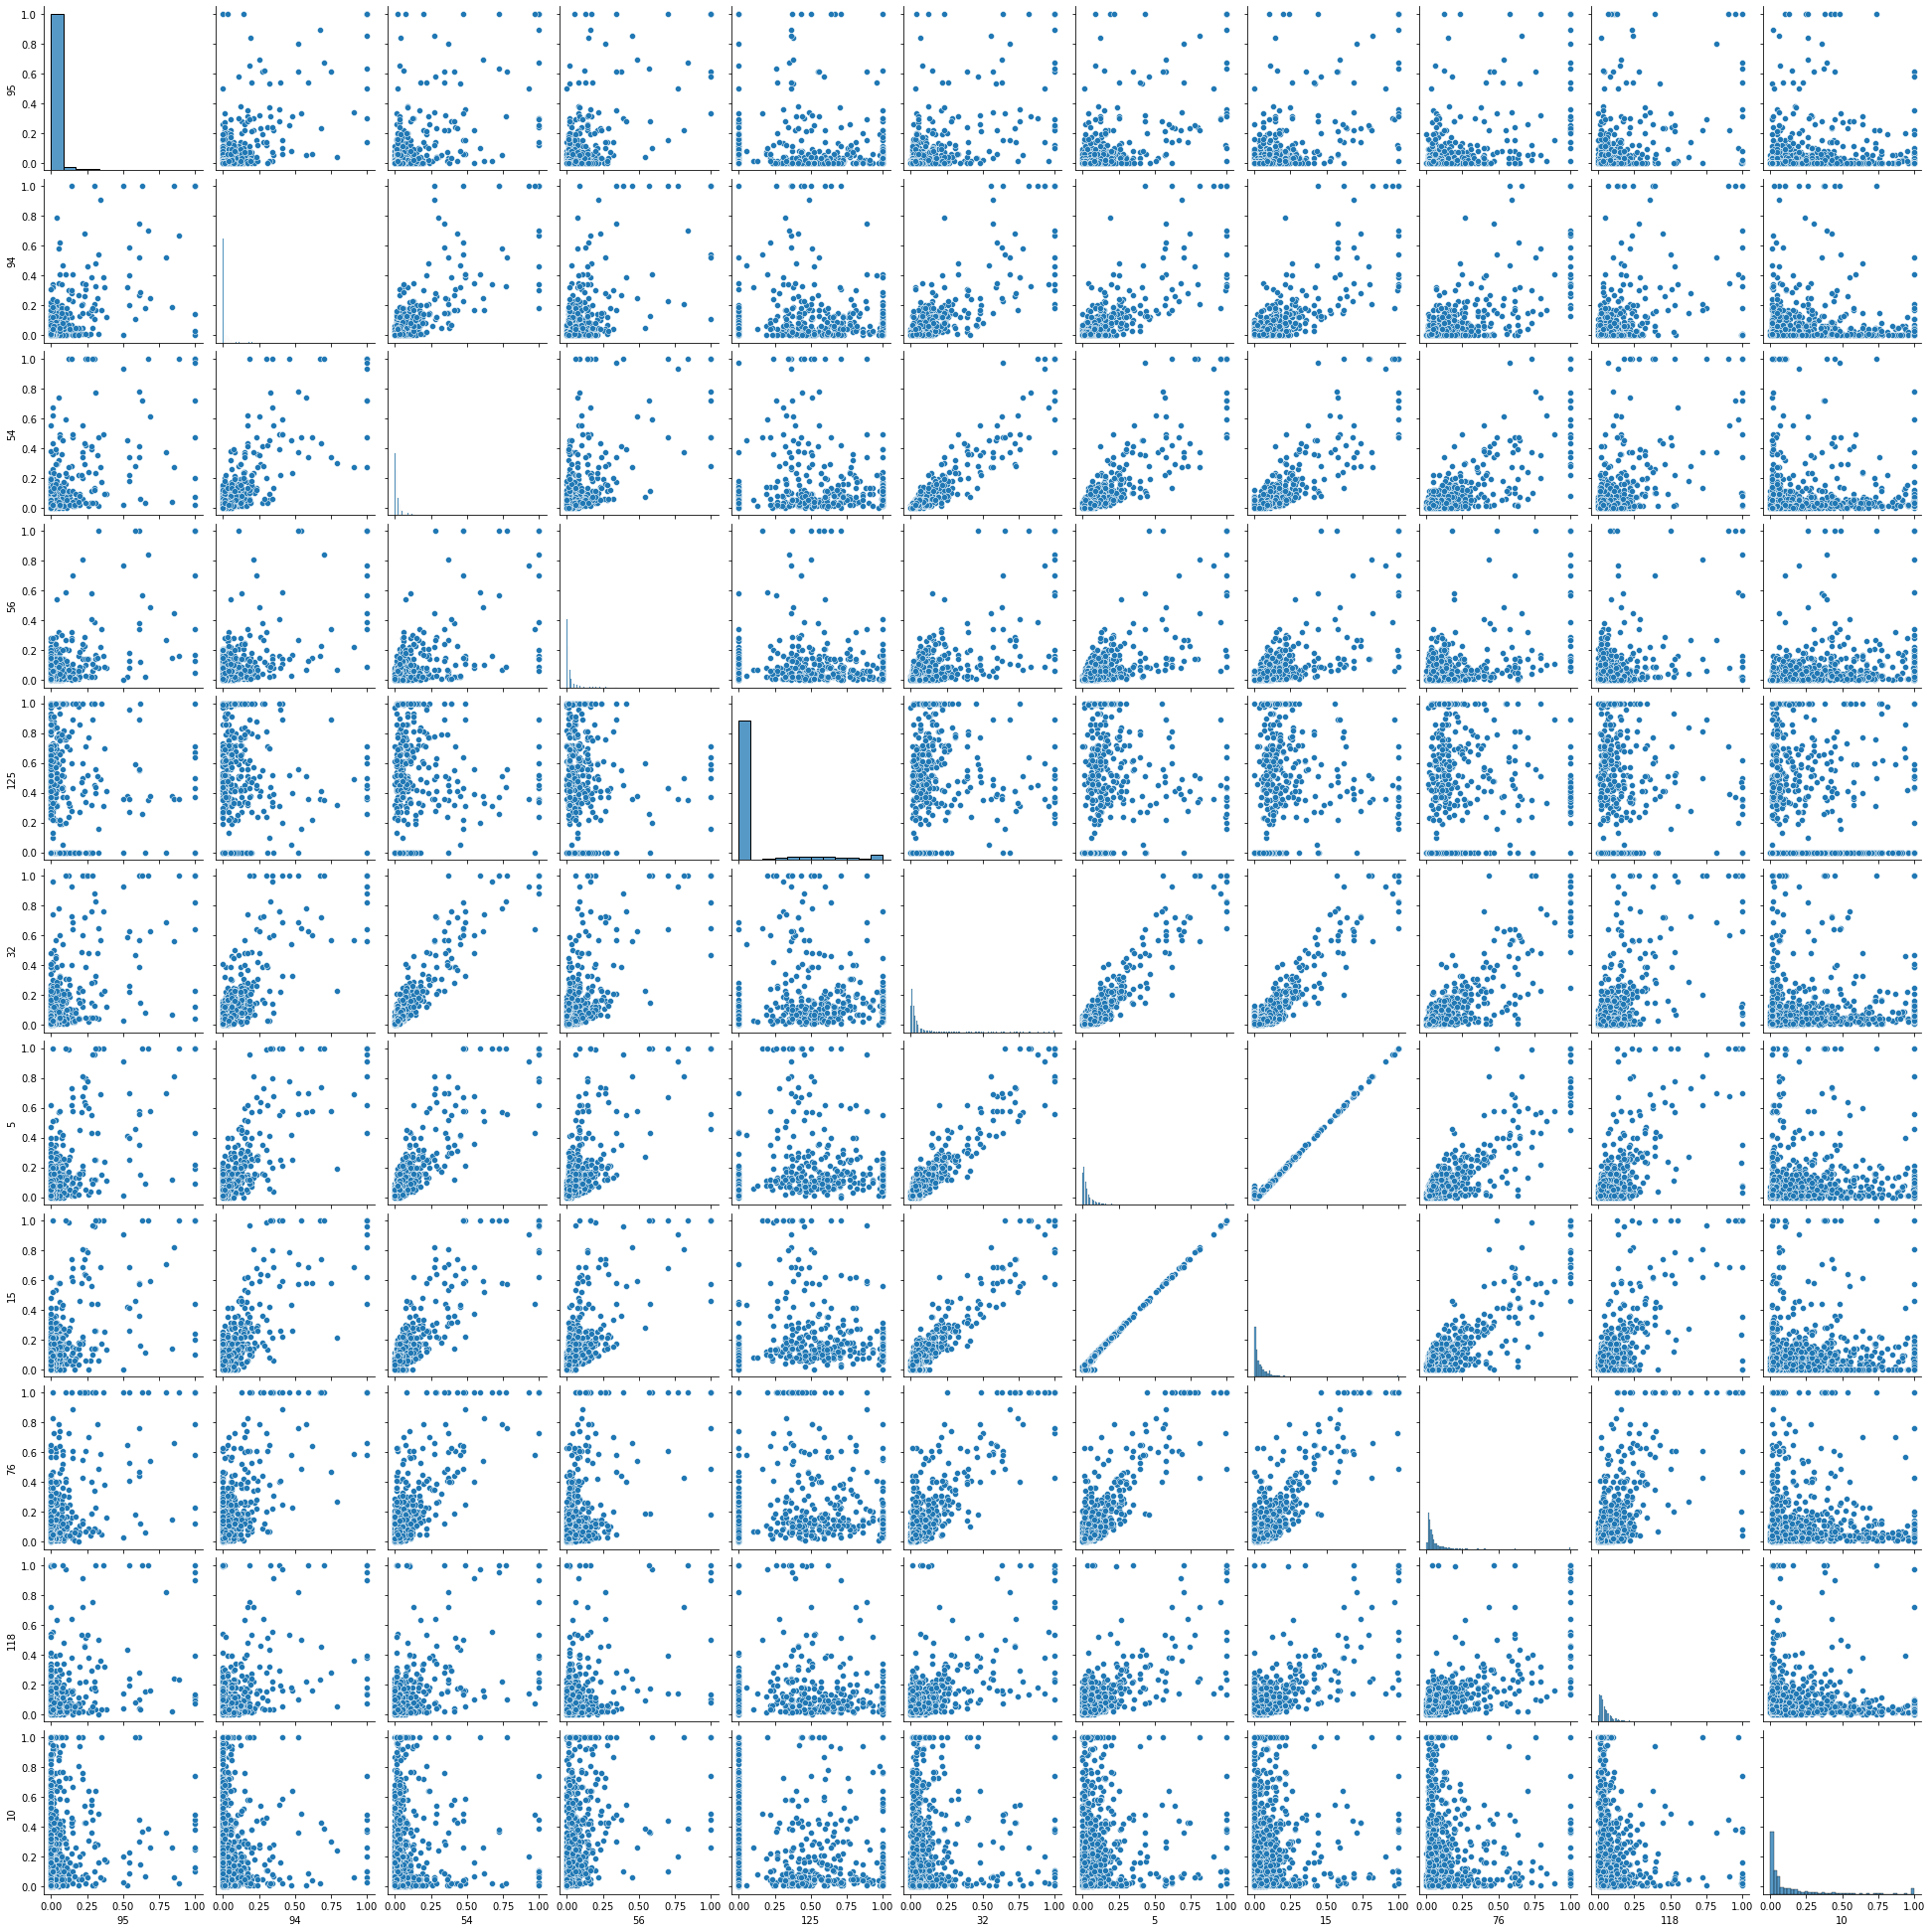

In [28]:
sns.pairplot(dt_top_11)

Pairplot doesn't reveal feature importance 
but rather shows the correlation between features and the amount of variance of a feature.

<AxesSubplot:>

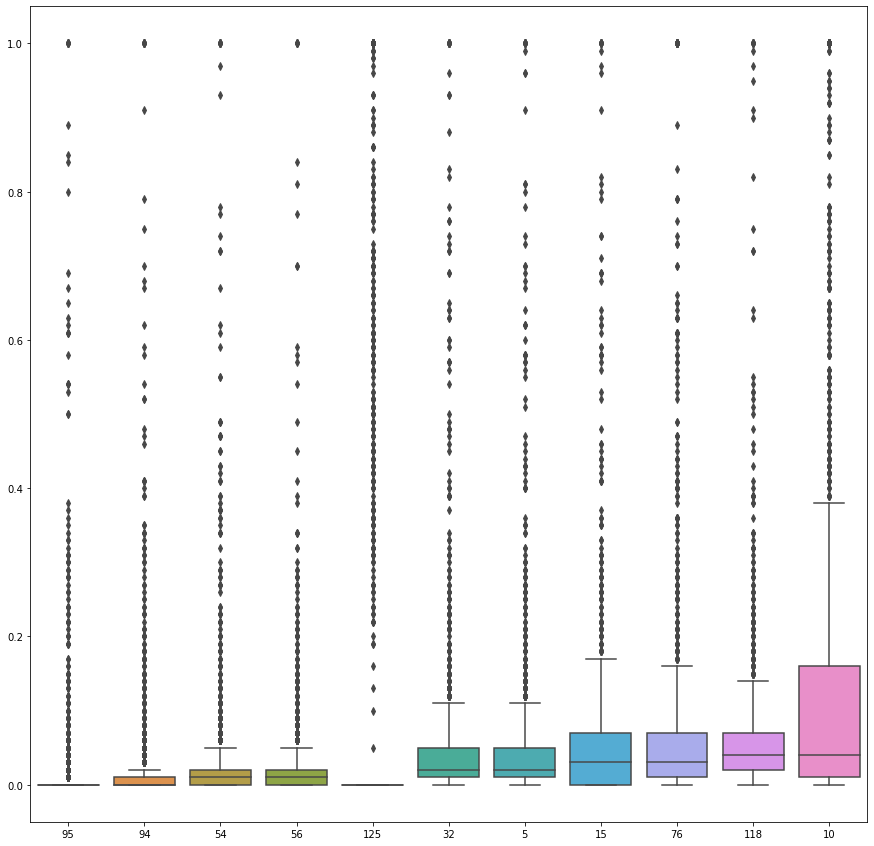

In [29]:
plt.figure(figsize=(15,15))

sns.boxplot(data = dt_top_11)

# 2 (F)

In [30]:
model = LinearRegression().fit(x_train,y_train)

In [31]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE : ",mse)

Test MSE :  6.169172750003596e+17


# 2 (G)

In [32]:
ridgecv = RidgeCV(cv = 10,alphas=[1e-4, 1e-3, 1e-2,1e-1, 1,1e1,1e2,1e3,1e4]).fit(x_train,y_train)
print("Best alpha value : ",ridgecv.alpha_)

Best alpha value :  1.0


In [33]:
model_2 = Ridge(alpha = ridgecv.alpha_).fit(x_train,y_train)
y_pred_2 = model_2.predict(x_test)
mse_2 = mean_squared_error(y_test, y_pred_2)
print("Test MSE Ridge : ", mse_2)

Test MSE Ridge :  0.01746735557339531


# 2 (H)

In [34]:
lassocv = LassoCV(cv = 10,alphas=[1e-4, 1e-3, 1e-2,1e-1, 1,1e1,1e2,1e3,1e4]).fit(x_train,y_train)
print("Best alpha value : ",lassocv.alpha_)

Best alpha value :  0.0001


In [35]:
model_3 = Lasso(alpha=lassocv.alpha_).fit(x_train,y_train)
y_pred_3 = model_3.predict(x_test)
mse_3 = mean_squared_error(y_test, y_pred_3)
print("Test MSE Lasso : ", mse_3)

Test MSE Lasso :  0.017578094726455714


In [36]:
# LASSO WITH STANDARDIZATION.
scale = StandardScaler().fit(x_train)
x_train_standardized = scale.transform(x_train)

In [37]:
x_test_standardized = scale.transform(x_test)

In [38]:
lassocv2 = LassoCV(cv = 10,alphas=[1e-4, 1e-3, 1e-2,1e-1, 1,1e1,1e2,1e3,1e4]).fit(x_train_standardized,y_train)
print("Best alpha value (Standardized Data) : ",lassocv2.alpha_)

Best alpha value (Standardized Data) :  0.001


In [39]:
model_31 = Lasso(alpha=lassocv2.alpha_).fit(x_train_standardized,y_train)
y_pred_31 = model_31.predict(x_test_standardized)
mse_31 = mean_squared_error(y_test, y_pred_31)
print("Test MSE Lasso (Standardized) : ", mse_3)

Test MSE Lasso (Standardized) :  0.017578094726455714


Test MSE for standardized and non standardized data is the same which is consistent with the fact that Decision Trees are 
insensitive to standardizing and scaling since they are not sensitive to variance in the data.

# 2 (I)

In [40]:
from sklearn.decomposition import PCA
nrange = np.arange(2,30)
pcr_gs = GridSearchCV(PCA(),
                     {
                        'n_components' : nrange
                         
                     }, cv = 5)
pcr_gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=PCA(),
             param_grid={'n_components': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [41]:
pcr_res = pd.DataFrame(pcr_gs.cv_results_)
print(pcr_res[['params','mean_test_score']])
print('Best Alpha Value : ',pcr_gs.best_estimator_)

                  params  mean_test_score
0    {'n_components': 2}        45.787228
1    {'n_components': 3}        50.589007
2    {'n_components': 4}        55.189565
3    {'n_components': 5}        58.754005
4    {'n_components': 6}        61.710637
5    {'n_components': 7}        64.382139
6    {'n_components': 8}        67.348725
7    {'n_components': 9}        69.679847
8   {'n_components': 10}        71.503441
9   {'n_components': 11}        73.751950
10  {'n_components': 12}        77.040318
11  {'n_components': 13}        78.447466
12  {'n_components': 14}        80.554796
13  {'n_components': 15}        82.102164
14  {'n_components': 16}        83.158829
15  {'n_components': 17}        84.245974
16  {'n_components': 18}        85.811970
17  {'n_components': 19}        87.255001
18  {'n_components': 20}        88.961100
19  {'n_components': 21}        90.983716
20  {'n_components': 22}        92.126009
21  {'n_components': 23}        93.297204
22  {'n_components': 24}        94

In [42]:
pca = PCA(n_components=29)
x_reduced = pca.fit_transform(train)

x_reduced_train = pca.fit_transform(x_train)
x_reduced_test = pca.transform(x_test)[:,:1]

regr = LinearRegression()
regr.fit(x_reduced_train[:,:1], y_train)

pred = regr.predict(x_reduced_test)
print("MSE PCR : ", mean_squared_error(y_test, pred))

# model_4 = PCA(n_components = 29).fit(x_train,y_train)
# y_pred_4 = model_4.predict(x_test)
# mse_4 = mean_squared_error(y_test, y_pred_4)
# print("Test MSE PCR : ", mse_4)

MSE PCR :  0.032050776525118715


# 2 (J)

In [43]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [44]:
xgb_gs = GridSearchCV(XGBRegressor(),
                     {
                        'alpha' : [100,10,1,0.1,0.01,0.001,0.0001,0]
                         
                     }, cv = 5 , scoring = 'neg_mean_squared_error')
xgb_gs.fit(x_train,y_train)
xgb_res = pd.DataFrame(xgb_gs.cv_results_)
print(xgb_res[['params','mean_test_score']])
print('Best Alpha Value : ',xgb_gs.best_estimator_)

              params  mean_test_score
0     {'alpha': 100}        -0.037632
1      {'alpha': 10}        -0.022307
2       {'alpha': 1}        -0.021604
3     {'alpha': 0.1}        -0.022348
4    {'alpha': 0.01}        -0.022653
5   {'alpha': 0.001}        -0.022993
6  {'alpha': 0.0001}        -0.022681
7       {'alpha': 0}        -0.022528
Best Alpha Value :  XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', r

In [45]:
model_5 = XGBRegressor(alpha = 1)
model_5.fit(x_train,y_train)
y_pred_5 = model_5.predict(x_test)

mse_5 = mean_squared_error(y_pred_5,y_test)
print("XGBoost  MSE : ", mse_5)

XGBoost  MSE :  0.017636416195392322


References 

https://stackoverflow.com/questions/31700691/convert-commas-decimal-separators-to-dots-within-a-dataframe

https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/

https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/

https://stackoverflow.com/questions/56088264/trouble-training-xgboost-on-categorical-column

https://www.statology.org/principal-components-regression-in-python/

https://vzhang1999.medium.com/classification-tree-growing-and-pruning-with-python-code-grid-search-cost-complexity-function-b2e45e33a1a4

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

https://www.analyticsvidhya.com/blog/2021/10/guide-to-deal-with-missing-values/

https://www.kaggle.com/general/226554

https://stackoverflow.com/questions/46193900/scikit-learn-ridgecv-seems-not-to-give-the-best-option